In [1]:
from google.colab import drive
drive.mount('/content/ShardDrives/', force_remount=True)

Mounted at /content/ShardDrives/


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw

In [3]:
!rm -rf /content/bloods

In [ ]:
!unzip /content/ShardDrives/MyDrive/bloods/blood_dataset_yolo.zip -d /content/

In [87]:
lymp_list = ['basophil','erythroblast','lymphocyte','neutrophil','eosinophil','monocyte']
class_name_to_id_mapping = {}
for i, elem in enumerate(lymp_list):
    class_name_to_id_mapping[elem] = i
print(class_name_to_id_mapping)

{'basophil': 0, 'erythroblast': 1, 'lymphocyte': 2, 'neutrophil': 3, 'eosinophil': 4, 'monocyte': 5}


In [ ]:
annotations = [os.path.join('/content/blood_dataset_yolo/labels/train', x) for x in os.listdir('/content/blood_dataset_yolo/labels/train') if x[-3:] == "txt"]
annotations

In [89]:
import os
import sys
annotation_list = []
# directory = os.path.dirname(os.path.realpath(sys.argv[0])) #get the directory of your script
for subdir, dirs, files in os.walk('/content/blood_dataset_yolo/labels/train'):
    for filename in files:
        subdirectoryPath = os.path.relpath(subdir, 'labels') #get the path to your subdirectory
        filePath = os.path.join(subdirectoryPath, filename) #get the path to your file
#         annotations.append('./Annotation/'+filename+'.xml')
#         path = '/media/ismail/Elements/formation/projet7/standford_dogs_dataset_yolo/labels/'+ subdirectoryPath+'/'
        if(filename.find('.txt') > 0):
            annotation_list.append('/content/blood_dataset_yolo/labels/train/'+filePath.replace('..',''))
#         print(subdirectoryPath)
#         print(filename.find('.xml'))

print(len(annotation_list))

9470


In [90]:
import random
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()




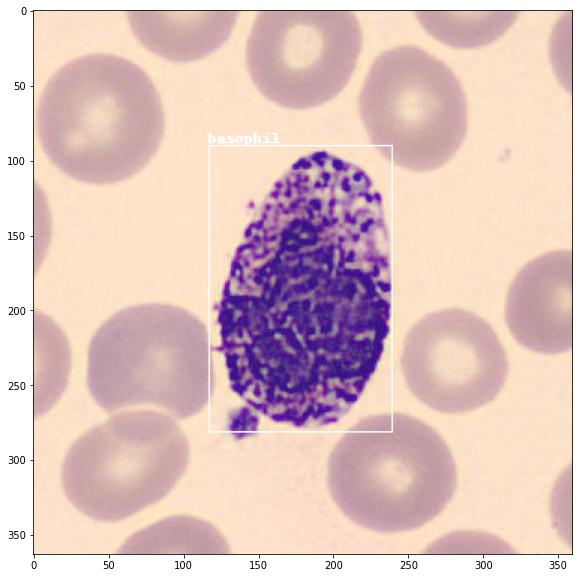

In [93]:
# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
# assert os.path.exists(image_file)
#Load the image
image = Image.open(image_file)
fig = plt.figure(figsize=(12,10))
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

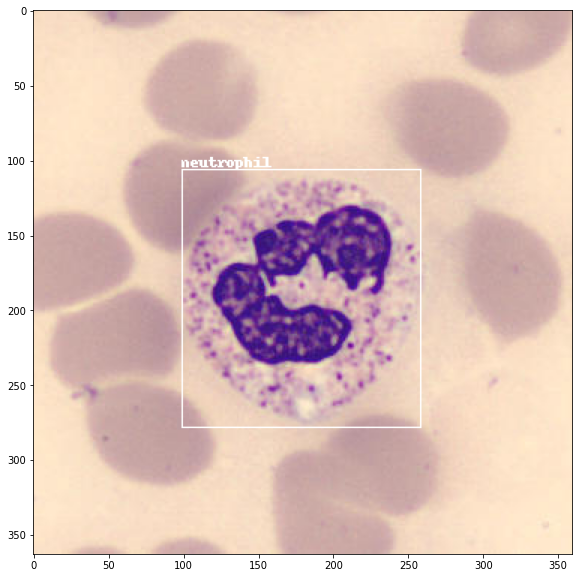

In [94]:
# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
# assert os.path.exists(image_file)
#Load the image
image = Image.open(image_file)
fig = plt.figure(figsize=(12,10))
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

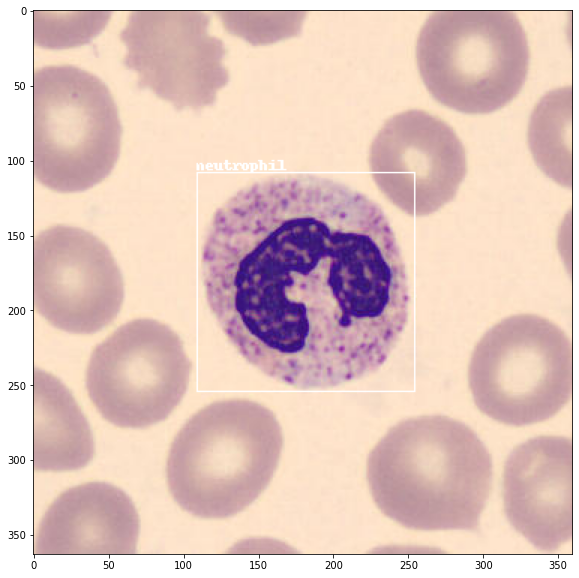

In [96]:
# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
# assert os.path.exists(image_file)
#Load the image
image = Image.open(image_file)
fig = plt.figure(figsize=(12,10))
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [5]:
!nvidia-smi

Sat Jan 28 11:24:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!git clone https://github.com/ultralytics/ultralytics
!cd ultralytics
!pip install -e ultralytics

In [10]:
!cp /content/ShardDrives/MyDrive/bloods/blood_yolov8.yaml /content/ultralytics/ultralytics/yolo/data/datasets/blood_yolov8.yaml

In [ ]:
# cd /content/yolov5

/content/yolov5


In [11]:
pwd

'/content'

In [ ]:
# !pip install wandb
# !wandb login

In [ ]:
# !wandb.init(project="blood_5l", entity="ismail-azdad")

/bin/bash: -c: line 0: syntax error near unexpected token `project="blood_5l",'
/bin/bash: -c: line 0: `wandb.init(project="blood_5l", entity="ismail-azdad")'


In [13]:
!yolo task=detect mode=train model=yolov8n.pt data=blood_yolov8.yaml epochs=50 imgsz=360 project=bloods name=blood

Ultralytics YOLOv8.0.22 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=blood_yolov8.yaml, epochs=50, patience=50, batch=16, imgsz=360, save=True, cache=False, device=, workers=8, project=bloods, name=blood, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, 

In [14]:
!mkdir /content/ShardDrives/MyDrive/bloods/blood_result_yolov8

In [15]:
!cp -fr /content/bloods /content/ShardDrives/MyDrive/bloods/blood_result_yolov8

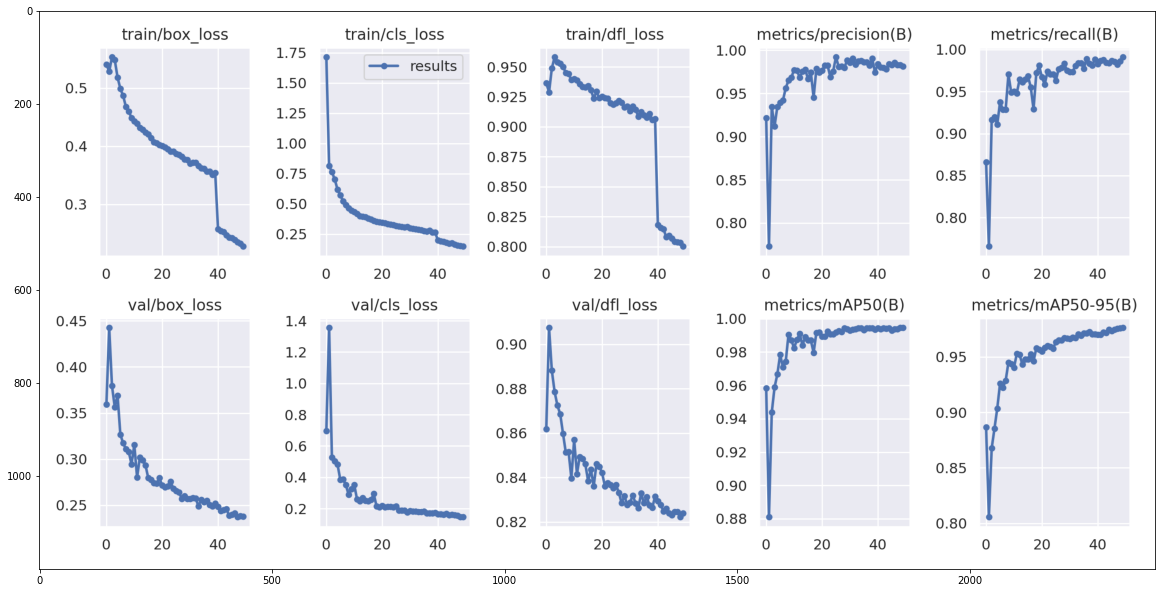

In [27]:
plt.figure(figsize=(20,20)) 
plt.imshow(np.array(Image.open("/content/bloods/blood/results.png")))

In [26]:
!yolo  mode=val model=/content/bloods/blood/weights/best.pt data=/content/ShardDrives/MyDrive/bloods/blood_yolov8.yaml imgsz=360 project=bloods_val name=bloods_val

Ultralytics YOLOv8.0.22 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs
WARNING ⚠️ --img-size [360] must be multiple of max stride 32, updating to [384]
val: Scanning /content/blood_dataset_yolo/labels/val.cache... 1183 images, 0 backgrounds, 0 corrupt: 100% 1183/1183 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 74/74 [00:10<00:00,  7.27it/s]
                   all       1183       1253      0.986      0.984      0.994      0.974
              basophil       1183        108      0.979      0.972      0.994      0.959
          erythroblast       1183        195      0.981      0.979      0.994      0.973
            lymphocyte       1183        135          1       0.99      0.995      0.983
            neutrophil       1183        371      0.994      0.992      0.995      0.985
            eosinophil       1183        313     

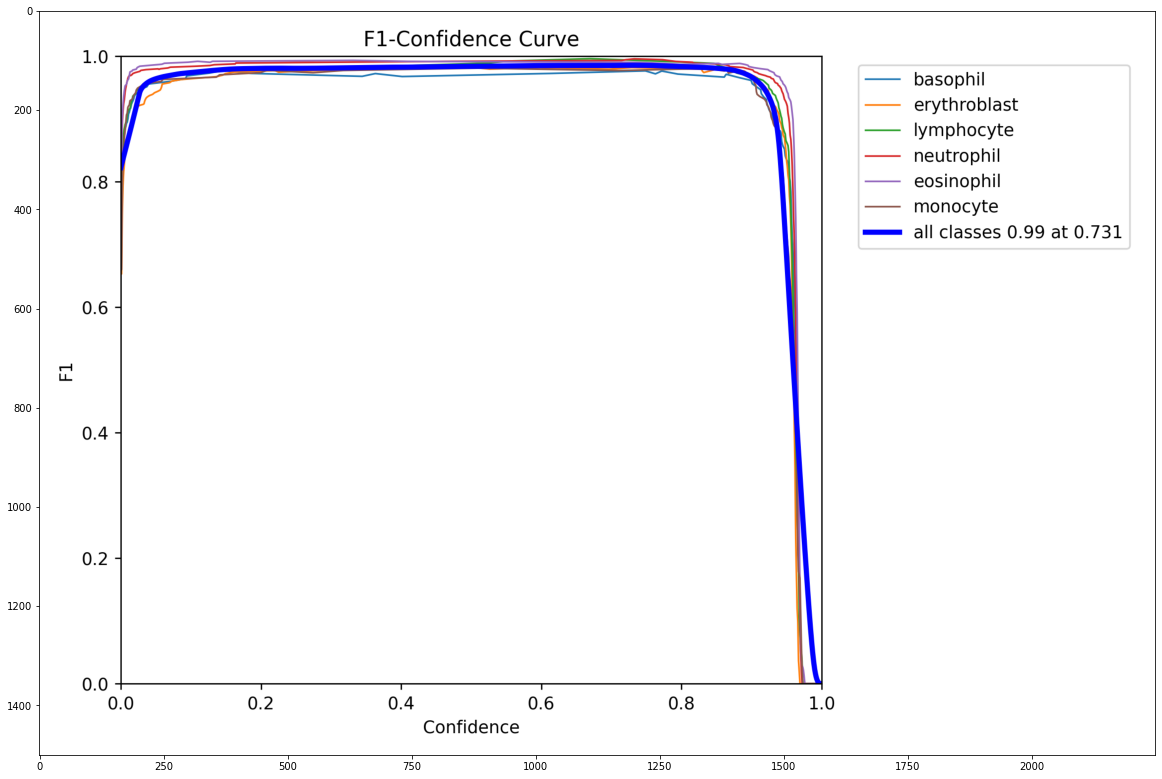

In [36]:
plt.figure(figsize=(20,20)) 
plt.imshow(np.array(Image.open("/content/bloods_val/bloods_val/F1_curve.png")))

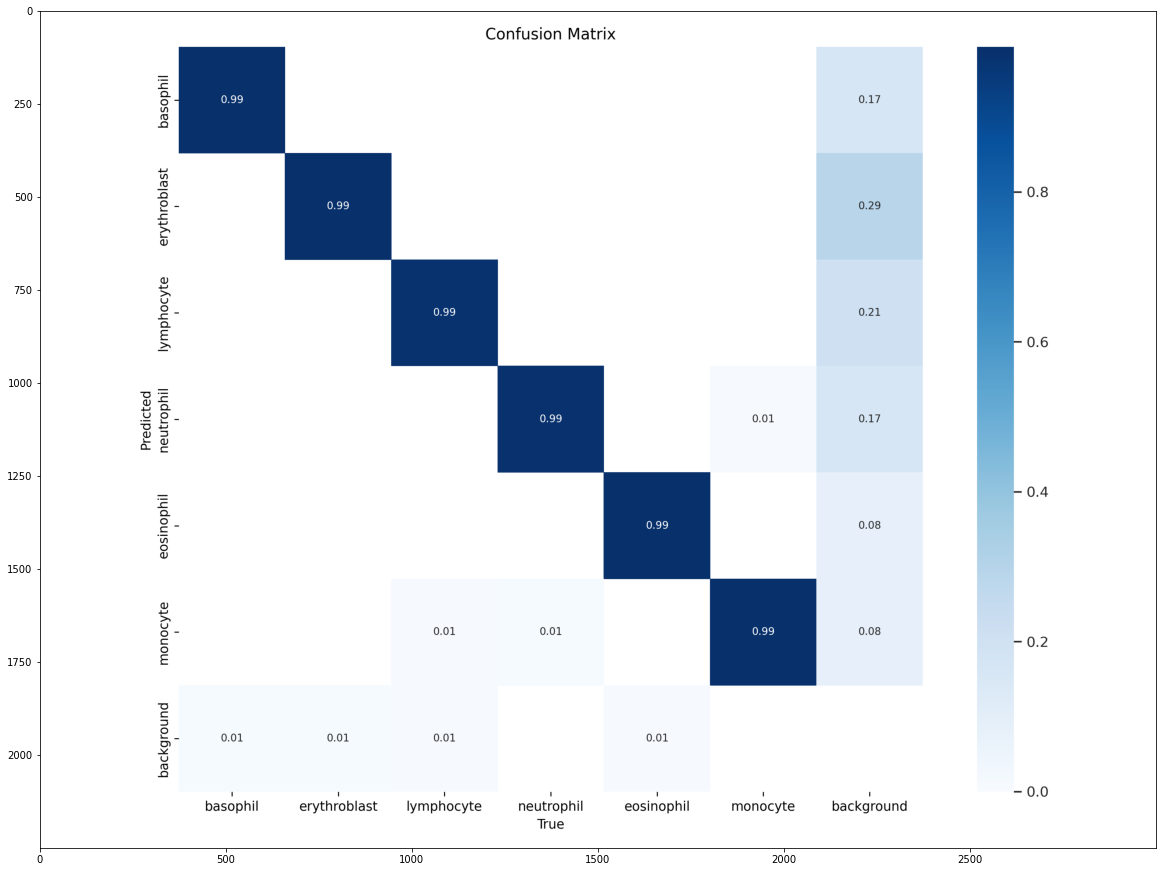

In [35]:
plt.figure(figsize=(20,20)) 
plt.imshow(np.array(Image.open("/content/bloods_val/bloods_val/confusion_matrix.png")))

In [31]:
!cp -fr /content/bloods_detect/bloods_detect/ /content/ShardDrives/MyDrive/bloods/

In [ ]:
# !yolo  mode=predict source=/content/blood_dataset_yolo/images/test/ model=/content/bloods/blood/weights/best.pt data=/content/ShardDrives/MyDrive/bloods/blood_yolov8.yaml imgsz=360 project=bloods_detect name=bloods_detect
!yolo task=detect source=/content/blood_dataset_yolo/images/test/ mode=predict model=/content/bloods/blood/weights/best.pt  conf=0.25 save=True 

In [23]:
pwd

'/content'

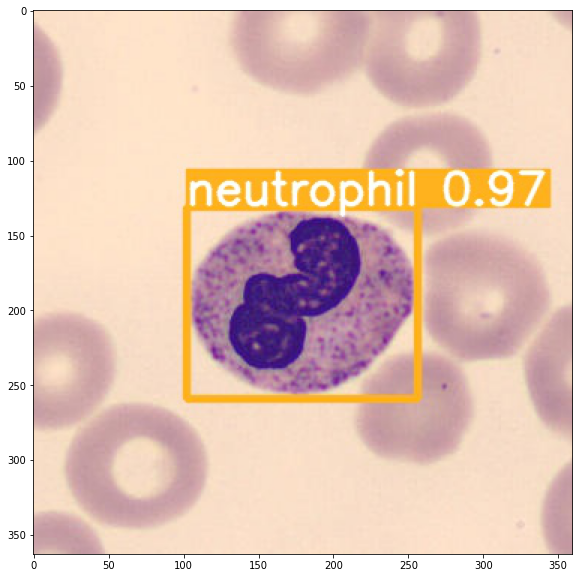

In [44]:
import os
from PIL import Image, ImageDraw
import random
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12,10))
detections_dir = "/content/ultralytics/runs/detect/predict"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

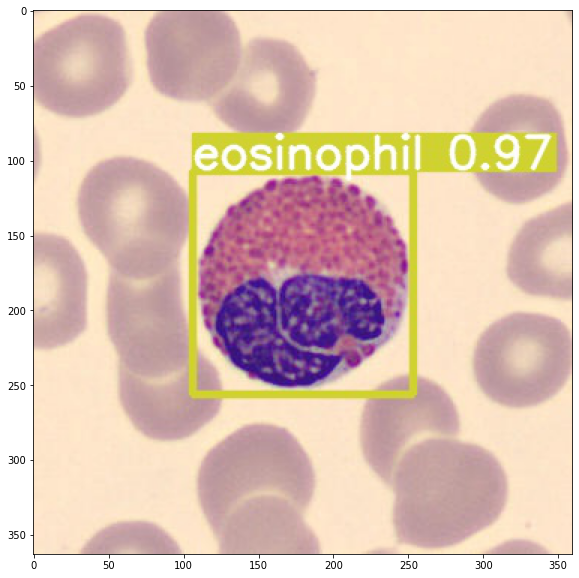

In [45]:
fig = plt.figure(figsize=(12,10))
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

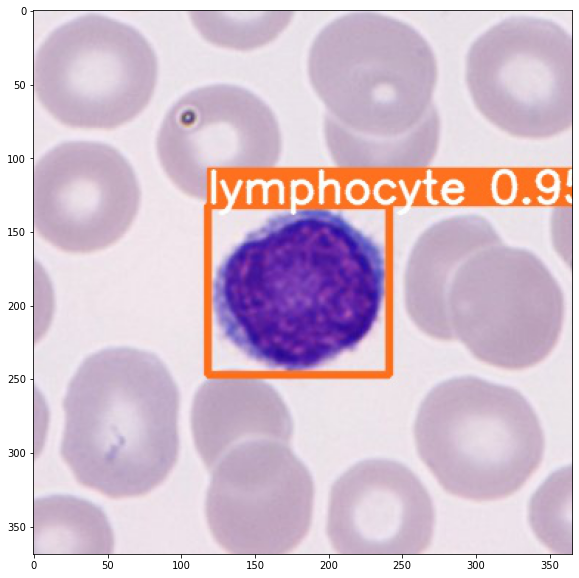

In [46]:
fig = plt.figure(figsize=(12,10))
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [73]:
def show_images_from_directory(path, num_sample):
    fig = plt.figure(figsize=(30,50))
    fig.patch.set_facecolor('#377AB7')
    images =random.choices(detection_images,k=num_sample)
    for i in range(num_sample):
        img = imgmp.imread(images[i])
        plt.subplot(num_sample/num_sample+1, num_sample, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show() 

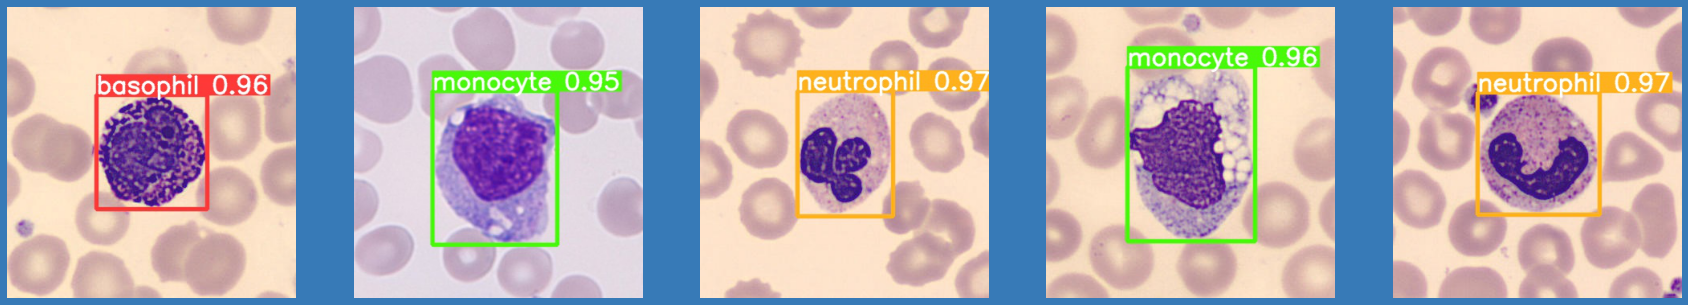

In [76]:
import matplotlib.image as imgmp
import os
show_images_from_directory("/content/ultralytics/runs/detect/predict", 5)

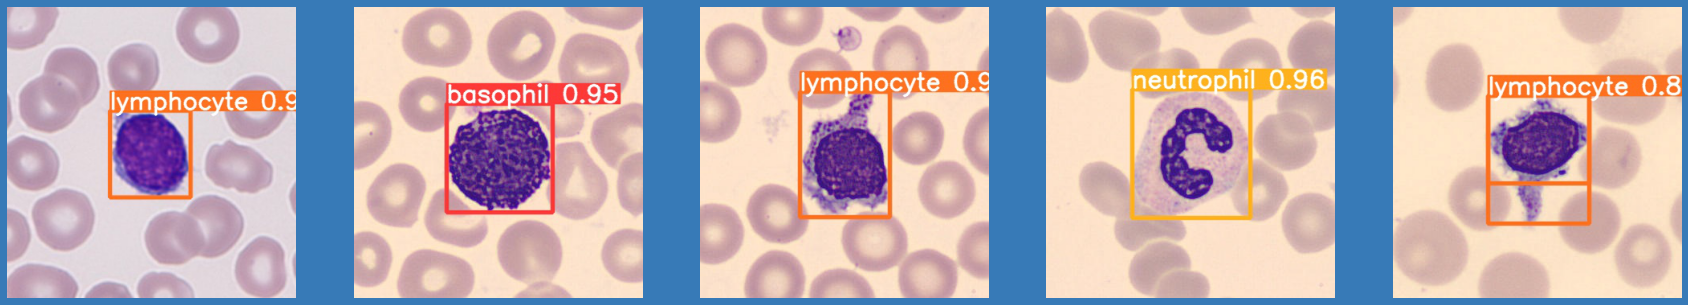

In [77]:
show_images_from_directory("/content/ultralytics/runs/detect/predict", 5)

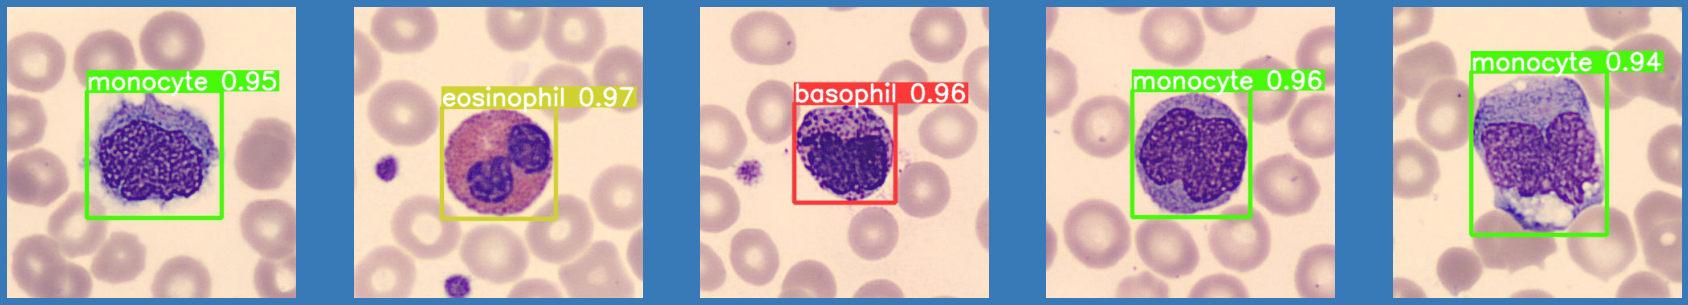

In [78]:
show_images_from_directory("/content/ultralytics/runs/detect/predict", 5)

In [79]:
import pandas as pd
results = pd.read_csv("/content/bloods/blood/results.csv",skipinitialspace=True)
results

epoch  train/box_loss  train/cls_loss  train/dfl_loss  \
0       0         0.54078         1.71340         0.93651   
1       1         0.52859         0.81379         0.92871   
2       2         0.55355         0.76204         0.94875   
3       3         0.54845         0.70317         0.95814   
4       4         0.51846         0.61887         0.95401   
5       5         0.49906         0.57046         0.95272   
6       6         0.48695         0.52223         0.95011   
7       7         0.46771         0.48867         0.94505   
8       8         0.45980         0.46267         0.94407   
9       9         0.44911         0.44344         0.93917   
10     10         0.44313         0.43234         0.93989   
11     11         0.43882         0.41727         0.93881   
12     12         0.43223         0.39823         0.93549   
13     13         0.42862         0.39385         0.93351   
14     14         0.42437         0.39087         0.93303   
15     15         0.42108         0.37992         0.93394   
16     16         0.41417         0.37255         0.93051   
17     17         0.40755         0.36106         0.92372   
18     18         0.40597         0.35180         0.92932   
19     19         0.40246         0.34759         0.92390   
20     20         0.40069         0.34513         0.92528   
21     21         0.39870         0.33994         0.92409   
22     22         0.39502         0.33165         0.92361   
23     23         0.39152         0.32789         0.91974   
24     24         0.39143         0.32648         0.91877   
25     25         0.38701         0.31859         0.91971   
26     26         0.38558         0.31506         0.92175   
27     27         0.38233         0.31012         0.92026   
28     28         0.37790         0.30460         0.91614   
29     29         0.37705         0.30940         0.91692   
30     30         0.37050         0.29645         0.91312   
31     31         0.37213         0.29601         0.91710   
32     32         0.37187         0.28991         0.91440   
33     33         0.36640         0.28685         0.90851   
34     34         0.36272         0.28176         0.91220   
35     35         0.36146         0.27641         0.90965   
36     36         0.35664         0.27182         0.90760   
37     37         0.35679         0.27884         0.91101   
38     38         0.35156         0.26505         0.90594   
39     39         0.35398         0.26318         0.90654   
40     40         0.25764         0.19664         0.81800   
41     41         0.25433         0.19133         0.81574   
42     42         0.25274         0.18647         0.81471   
43     43         0.24699         0.17870         0.80821   
44     44         0.24329         0.17121         0.80911   
45     45         0.24213         0.17410         0.80698   
46     46         0.23903         0.16268         0.80416   
47     47         0.23503         0.15753         0.80385   
48     48         0.23299         0.15192         0.80351   
49     49         0.22778         0.14734         0.80020   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0                0.92166            0.86578           0.95848   
1                0.77290            0.76570           0.88103   
2                0.93476            0.91620           0.94384   
3                0.91202            0.91969           0.95882   
4                0.93457            0.91062           0.96661   
5                0.93919            0.93764           0.97849   
6                0.94192            0.92859           0.97082   
7                0.95613            0.92844           0.97425   
8                0.96518            0.97045           0.99056   
9                0.96837            0.94887           0.98723   
10               0.97733            0.94993           0.98240   
11               0.97674            0.94803           0.98735   
12               0.96867            0.96430    

In [82]:
results.columns

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

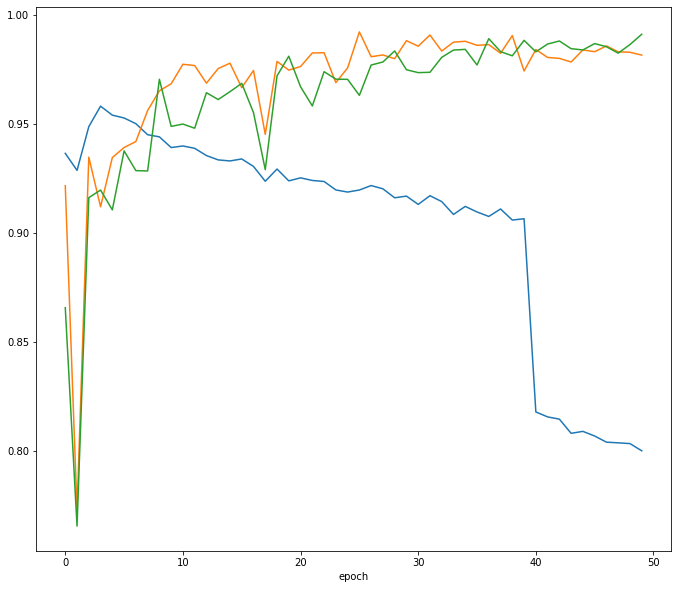

In [86]:
fig = plt.figure(figsize=(25,10))
# summarize history for accuracy

plt.subplot(1, 2, 1)
# plt.plot(results['train/box_loss'])
# plt.plot(results['train/obj_loss'])
plt.plot(results[ 'train/dfl_loss'])
plt.plot(results[ 'metrics/precision(B)'])
plt.plot(results['metrics/recall(B)'])
# plt.plot(results[ 'metrics/mAP50(B)'])
# plt.plot(results['metrics/mAP_0.5:0.95'])
# plt.plot(results['val/box_loss'])
# plt.plot(results['val/obj_loss'])
# plt.plot(results['val/cls_loss'])
# plt.plot(results['x/lr0'])
# plt.plot(results['x/lr1'])
# plt.plot(results[ 'x/lr2'])

# plt.title(modele_name+' '+ first_score, fontsize=18)
# plt.ylabel(first_score)
plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# # summarize history for loss
# plt.subplot(1, 2, 2)
# plt.plot(dict_history[second_score])
# plt.plot(dict_history['val_' + second_score],
#           linestyle='--', color="red")
# plt.title(modele_name +' '+ second_score, fontsize=18)
# plt.ylabel(second_score)
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
!pwd

/content/yolov5
